<a href="https://colab.research.google.com/github/rakshithbr2002-blip/Code-and-Data-Repository/blob/main/ml_paper_(16_8_2025)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# ✅ Load data
df = pd.read_excel('/content/Data_v1_16-8-2025.xlsx')  # Replace with your actual path

# ✅ Step 1: Drop unwanted columns
cols_to_drop = ["Exposure type", "Days", "Sex"]
df = df.drop(columns=cols_to_drop)

# ✅ Step 2: Drop missing values
df = df.dropna()

# ✅ Step 3: Encode categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# ✅ Step 4: Separate features and target
X = df.drop("Target Class", axis=1)
y = df["Target Class"]

# ✅ Initialize cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores, f1_scores, prec_scores, rec_scores, spec_scores, sens_scores = [], [], [], [], [], []

# ✅ Start cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # ✅ Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # ✅ One-hot encode target
    y_train_cat = to_categorical(y_train)
    y_val_cat = to_categorical(y_val)

    # ✅ Build MLP model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(64, activation='relu'),
        Dense(y_train_cat.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # ✅ Train the model
    model.fit(
        X_train_scaled, y_train_cat,
        validation_data=(X_val_scaled, y_val_cat),
        epochs=50,
        batch_size=32,
        verbose=0
    )

    # ✅ Evaluate on validation set
    y_val_pred = model.predict(X_val_scaled)
    y_val_labels = np.argmax(y_val_pred, axis=1)

    acc = accuracy_score(y_val, y_val_labels)
    f1 = f1_score(y_val, y_val_labels, average='weighted')
    prec = precision_score(y_val, y_val_labels, average='weighted', zero_division=0)
    rec = recall_score(y_val, y_val_labels, average='weighted')

    # ✅ Compute confusion matrix
    cm = confusion_matrix(y_val, y_val_labels)
    if cm.shape == (2, 2):  # Binary classification
        tn, fp, fn, tp = cm.ravel()
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0
        sens = tp / (tp + fn) if (tp + fn) > 0 else 0
    else:  # Multi-class case → mean specificity & sensitivity
        spec_list, sens_list = [], []
        for i in range(cm.shape[0]):
            tp = cm[i, i]
            fn = np.sum(cm[i, :]) - tp
            fp = np.sum(cm[:, i]) - tp
            tn = np.sum(cm) - (tp + fp + fn)
            spec_list.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
            sens_list.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        spec = np.mean(spec_list)
        sens = np.mean(sens_list)

    acc_scores.append(acc)
    f1_scores.append(f1)
    prec_scores.append(prec)
    rec_scores.append(rec)
    spec_scores.append(spec)
    sens_scores.append(sens)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(f"Fold {fold} F1 Score: {f1:.4f}")
    print(f"Fold {fold} Precision: {prec:.4f}")
    print(f"Fold {fold} Recall: {rec:.4f}")
    print(f"Fold {fold} Specificity: {spec:.4f}")
    print(f"Fold {fold} Sensitivity: {sens:.4f}")

# ✅ Final scores
print("\n====== Final Cross-Validation Results ======")
print(f"Mean Validation Accuracy:   {np.mean(acc_scores):.4f}")
print(f"Mean Validation F1 Score:   {np.mean(f1_scores):.4f}")
print(f"Mean Precision:             {np.mean(prec_scores):.4f}")
print(f"Mean Recall:                {np.mean(rec_scores):.4f}")
print(f"Mean Specificity:           {np.mean(spec_scores):.4f}")
print(f"Mean Sensitivity:           {np.mean(sens_scores):.4f}")


--- Fold 1 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Fold 1 Accuracy: 1.0000
Fold 1 F1 Score: 1.0000
Fold 1 Precision: 1.0000
Fold 1 Recall: 1.0000
Fold 1 Specificity: 1.0000
Fold 1 Sensitivity: 1.0000

--- Fold 2 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Fold 2 Accuracy: 0.9600
Fold 2 F1 Score: 0.9599
Fold 2 Precision: 0.9636
Fold 2 Recall: 0.9600
Fold 2 Specificity: 0.9833
Fold 2 Sensitivity: 0.9500

--- Fold 3 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 3 Accuracy: 1.0000
Fold 3 F1 Score: 1.0000
Fold 3 Precision: 1.0000
Fold 3 Recall: 1.0000
Fold 3 Specificity: 1.0000
Fold 3 Sensitivity: 1.0000

--- Fold 4 ---
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Fold 4 Accuracy: 1.0000
Fold 4 F1 Score: 1.0000
Fold 4 Precision: 1.0000
Fold 4 Recall: 1.0000
Fold 4 Specificity: 1.0000
Fold 4 Sensitivity: 1.0000

--- Fold 5 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Fold 5 Accuracy: 1.0000
Fold 5 F1 Score: 1.0000
Fold 5 Precision: 1.0000
Fold 5 Recall: 1.0000
Fold 5 Specificity: 1.0000
Fold 5 Sensitivity: 1.0000

====== Final Cross-Validation Results ======
Mean Validation Accuracy:   0.9920
Mean Validation F1 Score:   0.9920
Mean Precision:             0.9927
Mean Recall:                0.9920
Mean Specificity:           0.9967
Mean Sensitivity:           0.9900


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
)
from xgboost import XGBClassifier

# ✅ Load data
df = pd.read_excel('/content/Data_v1_16-8-2025.xlsx')  # Replace with your actual path

# ✅ Step 1: Drop unwanted columns
cols_to_drop = ["Exposure type", "Days", "Sex"]
df = df.drop(columns=cols_to_drop)

# ✅ Step 2: Encode categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# ✅ Step 3: Separate features and target
X = df.drop("Target Class", axis=1)
y = df["Target Class"]

# ✅ Step 4: Cross-validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, f1_scores, prec_scores, rec_scores, spec_scores, sens_scores = [], [], [], [], [], []

# ✅ Step 5: Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # ✅ Feature scaling (optional for XGBoost)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # ✅ Initialize XGBoost model
    model = XGBClassifier(
        objective='multi:softmax',
        num_class=len(np.unique(y)),
        eval_metric='mlogloss',
        use_label_encoder=False,
        n_estimators=100,
        random_state=42
    )

    # ✅ Train
    model.fit(X_train_scaled, y_train)

    # ✅ Predict and evaluate
    y_val_pred = model.predict(X_val_scaled)

    acc = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    prec = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
    rec = recall_score(y_val, y_val_pred, average='weighted')

    # ✅ Confusion Matrix for Specificity & Sensitivity
    cm = confusion_matrix(y_val, y_val_pred)
    if cm.shape == (2, 2):  # Binary classification
        tn, fp, fn, tp = cm.ravel()
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0
        sens = tp / (tp + fn) if (tp + fn) > 0 else 0
    else:  # Multi-class average
        spec_list, sens_list = [], []
        for i in range(cm.shape[0]):
            tp = cm[i, i]
            fn = np.sum(cm[i, :]) - tp
            fp = np.sum(cm[:, i]) - tp
            tn = np.sum(cm) - (tp + fp + fn)
            spec_list.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
            sens_list.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        spec = np.mean(spec_list)
        sens = np.mean(sens_list)

    acc_scores.append(acc)
    f1_scores.append(f1)
    prec_scores.append(prec)
    rec_scores.append(rec)
    spec_scores.append(spec)
    sens_scores.append(sens)

    print(f"Fold {fold} Accuracy:    {acc:.4f}")
    print(f"Fold {fold} F1 Score:    {f1:.4f}")
    print(f"Fold {fold} Precision:   {prec:.4f}")
    print(f"Fold {fold} Recall:      {rec:.4f}")
    print(f"Fold {fold} Specificity: {spec:.4f}")
    print(f"Fold {fold} Sensitivity: {sens:.4f}")

# ✅ Step 6: Final Results
print("\n====== Final XGBoost Cross-Validation Results ======")
print(f"Mean Validation Accuracy:   {np.mean(acc_scores):.4f}")
print(f"Mean Validation F1 Score:   {np.mean(f1_scores):.4f}")
print(f"Mean Precision:             {np.mean(prec_scores):.4f}")
print(f"Mean Recall (Weighted):     {np.mean(rec_scores):.4f}")
print(f"Mean Specificity (Macro):   {np.mean(spec_scores):.4f}")
print(f"Mean Sensitivity (Macro):   {np.mean(sens_scores):.4f}")



--- Fold 1 ---
Fold 1 Accuracy:    0.9800
Fold 1 F1 Score:    0.9797
Fold 1 Precision:   0.9810
Fold 1 Recall:      0.9800
Fold 1 Specificity: 0.9917
Fold 1 Sensitivity: 0.9750

--- Fold 2 ---
Fold 2 Accuracy:    0.9800
Fold 2 F1 Score:    0.9799
Fold 2 Precision:   0.9818
Fold 2 Recall:      0.9800
Fold 2 Specificity: 0.9938
Fold 2 Sensitivity: 0.9750

--- Fold 3 ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:50:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:50:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:50:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:50:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3 Accuracy:    0.9800
Fold 3 F1 Score:    0.9799
Fold 3 Precision:   0.9818
Fold 3 Recall:      0.9800
Fold 3 Specificity: 0.9938
Fold 3 Sensitivity: 0.9750

--- Fold 4 ---
Fold 4 Accuracy:    0.9600
Fold 4 F1 Score:    0.9608
Fold 4 Precision:   0.9667
Fold 4 Recall:      0.9600
Fold 4 Specificity: 0.9875
Fold 4 Sensitivity: 0.9500

--- Fold 5 ---
Fold 5 Accuracy:    1.0000
Fold 5 F1 Score:    1.0000
Fold 5 Precision:   1.0000
Fold 5 Recall:      1.0000
Fold 5 Specificity: 1.0000
Fold 5 Sensitivity: 1.0000

====== Final XGBoost Cross-Validation Results ======
Mean Validation Accuracy:   0.9800
Mean Validation F1 Score:   0.9801
Mean Precision:             0.9823
Mean Recall (Weighted):     0.9800
Mean Specificity (Macro):   0.9933
Mean Sensitivity (Macro):   0.9750


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:50:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# ✅ Load data
df = pd.read_excel('/content/Data_v1_16-8-2025.xlsx')  # Replace with your path

# ✅ Step 1: Drop unwanted columns
cols_to_drop = ["Exposure type", "Days", "Sex"]
df = df.drop(columns=cols_to_drop)

# ✅ Step 2: Encode categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# ✅ Step 3: Split features and target
X = df.drop("Target Class", axis=1)
y = df["Target Class"]

# ✅ Step 4: Stratified Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []
sensitivity_scores = []

# ✅ Step 5: Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # ✅ Decision Tree model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    # ✅ Metrics
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')

    # Confusion matrix-based metrics
    cm = confusion_matrix(y_val, y_pred)
    TN = np.diag(cm).sum() - np.sum(cm) + np.trace(cm)  # Simplified for multi-class
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)

    # Specificity and Sensitivity (Macro)
    specificity = np.mean(TN / (TN + FP + 1e-9))
    sensitivity = np.mean(TP / (TP + FN + 1e-9))

    # Append results
    acc_scores.append(acc)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    print(f"Fold {fold} Accuracy:     {acc:.4f}")
    print(f"Fold {fold} F1 Score:     {f1:.4f}")
    print(f"Fold {fold} Precision:    {precision:.4f}")
    print(f"Fold {fold} Recall:       {recall:.4f}")
    print(f"Fold {fold} Specificity:  {specificity:.4f}")
    print(f"Fold {fold} Sensitivity:  {sensitivity:.4f}")

# ✅ Step 6: Mean Results
print("\n====== Final Decision Tree Cross-Validation Results ======")
print(f"Mean Validation Accuracy:   {np.mean(acc_scores):.4f}")
print(f"Mean Validation F1 Score:   {np.mean(f1_scores):.4f}")
print(f"Mean Precision:             {np.mean(precision_scores):.4f}")
print(f"Mean Recall (Weighted):     {np.mean(recall_scores):.4f}")
print(f"Mean Specificity (Macro):   {np.mean(specificity_scores):.4f}")
print(f"Mean Sensitivity (Macro):   {np.mean(sensitivity_scores):.4f}")



--- Fold 1 ---
Fold 1 Accuracy:     1.0000
Fold 1 F1 Score:     1.0000
Fold 1 Precision:    1.0000
Fold 1 Recall:       1.0000
Fold 1 Specificity:  1.0000
Fold 1 Sensitivity:  1.0000

--- Fold 2 ---
Fold 2 Accuracy:     1.0000
Fold 2 F1 Score:     1.0000
Fold 2 Precision:    1.0000
Fold 2 Recall:       1.0000
Fold 2 Specificity:  1.0000
Fold 2 Sensitivity:  1.0000

--- Fold 3 ---
Fold 3 Accuracy:     0.9800
Fold 3 F1 Score:     0.9799
Fold 3 Precision:    0.9818
Fold 3 Recall:       0.9800
Fold 3 Specificity:  0.9949
Fold 3 Sensitivity:  0.9750

--- Fold 4 ---
Fold 4 Accuracy:     0.9800
Fold 4 F1 Score:     0.9799
Fold 4 Precision:    0.9818
Fold 4 Recall:       0.9800
Fold 4 Specificity:  0.9949
Fold 4 Sensitivity:  0.9750

--- Fold 5 ---
Fold 5 Accuracy:     1.0000
Fold 5 F1 Score:     1.0000
Fold 5 Precision:    1.0000
Fold 5 Recall:       1.0000
Fold 5 Specificity:  1.0000
Fold 5 Sensitivity:  1.0000

====== Final Decision Tree Cross-Validation Results ======
Mean Validation Accu

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# ✅ Load data
df = pd.read_excel("/content/Data_v1_16-8-2025.xlsx")  # Replace path

# ✅ Drop unwanted columns if they exist
cols_to_drop = ["Exposure type", "Days", "Sex"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# ✅ Drop missing values
df = df.dropna()

# ✅ Encode categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# ✅ Separate features and target
X = df.drop("Target Class", axis=1)
y = df["Target Class"]

# ✅ Cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, f1_scores, precision_scores, recall_scores, specificity_scores, sensitivity_scores = [], [], [], [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # ✅ Scale numeric features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # ✅ Train KNN
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_scaled, y_train)

    # ✅ Predictions
    y_pred = model.predict(X_val_scaled)

    # ✅ Compute metrics
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)

    # ✅ Compute confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    num_classes = cm.shape[0]

    specificity_per_class = []
    sensitivity_per_class = []

    for i in range(num_classes):
        tp = cm[i, i]
        fn = np.sum(cm[i, :]) - tp
        fp = np.sum(cm[:, i]) - tp
        tn = np.sum(cm) - (tp + fn + fp)

        specificity = tn / (tn + fp + 1e-10)
        sensitivity = tp / (tp + fn + 1e-10)

        specificity_per_class.append(specificity)
        sensitivity_per_class.append(sensitivity)

    # ✅ Macro averages
    specificity_macro = np.mean(specificity_per_class)
    sensitivity_macro = np.mean(sensitivity_per_class)

    # ✅ Store results
    acc_scores.append(acc)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    specificity_scores.append(specificity_macro)
    sensitivity_scores.append(sensitivity_macro)

    print(f"Accuracy: {acc:.4f} | F1: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f}")
    print(f"Specificity: {specificity_macro:.4f} | Sensitivity: {sensitivity_macro:.4f}")

# ✅ Final Results
print("\n====== Final Cross-Validation Results (KNN) ======")
print(f"Mean Validation Accuracy:   {np.mean(acc_scores):.4f}")
print(f"Mean Validation F1 Score:   {np.mean(f1_scores):.4f}")
print(f"Mean Precision:             {np.mean(precision_scores):.4f}")
print(f"Mean Recall (Weighted):     {np.mean(recall_scores):.4f}")
print(f"Mean Specificity (Macro):   {np.mean(specificity_scores):.4f}")
print(f"Mean Sensitivity (Macro):   {np.mean(sensitivity_scores):.4f}")



--- Fold 1 ---
Accuracy: 0.9800 | F1: 0.9797 | Precision: 0.9810 | Recall: 0.9800
Specificity: 0.9917 | Sensitivity: 0.9750

--- Fold 2 ---
Accuracy: 0.9600 | F1: 0.9587 | Precision: 0.9636 | Recall: 0.9600
Specificity: 0.9833 | Sensitivity: 0.9500

--- Fold 3 ---
Accuracy: 0.9800 | F1: 0.9797 | Precision: 0.9810 | Recall: 0.9800
Specificity: 0.9917 | Sensitivity: 0.9750

--- Fold 4 ---
Accuracy: 1.0000 | F1: 1.0000 | Precision: 1.0000 | Recall: 1.0000
Specificity: 1.0000 | Sensitivity: 1.0000

--- Fold 5 ---
Accuracy: 0.9800 | F1: 0.9797 | Precision: 0.9810 | Recall: 0.9800
Specificity: 0.9917 | Sensitivity: 0.9750

====== Final Cross-Validation Results (KNN) ======
Mean Validation Accuracy:   0.9800
Mean Validation F1 Score:   0.9796
Mean Precision:             0.9813
Mean Recall (Weighted):     0.9800
Mean Specificity (Macro):   0.9917
Mean Sensitivity (Macro):   0.9750


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
)


# ✅ Load dataset
df = pd.read_excel("/content/Data_v1_16-8-2025.xlsx")  # replace with your file path
target_column = "Target Class"  # replace with your target column
cols_to_drop = ["Exposure type", "Days", "Sex"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
# ✅ Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# ✅ Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ✅ Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

# ✅ Preprocessing (scale numeric, one-hot encode categorical)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ]
)

# ✅ Define SVM classifier (RBF kernel for non-linear classification)
svm_clf = SVC(kernel="rbf", probability=True, random_state=42)

# ✅ Pipeline
svm_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("svm", svm_clf)
])

# ✅ Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, f1_scores, precisions, recalls, sensitivities, specificities = [], [], [], [], [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y_encoded), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # ✅ Train and predict
    svm_pipeline.fit(X_train, y_train)
    y_pred = svm_pipeline.predict(X_test)

    # ✅ Basic metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")

    # ✅ Sensitivity (macro recall)
    sensitivity = recall_score(y_test, y_pred, average="macro")

    # ✅ Specificity (macro)
    cm = confusion_matrix(y_test, y_pred)
    num_classes = cm.shape[0]
    spec_per_class = []
    for i in range(num_classes):
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
        fp = np.sum(np.delete(cm[:, i], i))
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0
        spec_per_class.append(spec)
    specificity = np.mean(spec_per_class)

    # ✅ Store results
    acc_scores.append(acc)
    f1_scores.append(f1)
    precisions.append(prec)
    recalls.append(rec)
    sensitivities.append(sensitivity)
    specificities.append(specificity)

    print(f"\nFold {fold}")
    print(f"Accuracy:              {acc:.4f}")
    print(f"F1 Score:              {f1:.4f}")
    print(f"Precision (Weighted):  {prec:.4f}")
    print(f"Recall (Weighted):     {rec:.4f}")
    print(f"Sensitivity (Macro):   {sensitivity:.4f}")
    print(f"Specificity (Macro):   {specificity:.4f}")

# ✅ Final Summary
print("\n====== Final Cross-Validation Results ======")
print(f"Mean Accuracy:              {np.mean(acc_scores):.4f}")
print(f"Mean F1 Score:              {np.mean(f1_scores):.4f}")
print(f"Mean Precision (Weighted):  {np.mean(precisions):.4f}")
print(f"Mean Recall (Weighted):     {np.mean(recalls):.4f}")
print(f"Mean Sensitivity (Macro):   {np.mean(sensitivities):.4f}")
print(f"Mean Specificity (Macro):   {np.mean(specificities):.4f}")



Fold 1
Accuracy:              1.0000
F1 Score:              1.0000
Precision (Weighted):  1.0000
Recall (Weighted):     1.0000
Sensitivity (Macro):   1.0000
Specificity (Macro):   1.0000

Fold 2
Accuracy:              1.0000
F1 Score:              1.0000
Precision (Weighted):  1.0000
Recall (Weighted):     1.0000
Sensitivity (Macro):   1.0000
Specificity (Macro):   1.0000

Fold 3
Accuracy:              0.9800
F1 Score:              0.9797
Precision (Weighted):  0.9810
Recall (Weighted):     0.9800
Sensitivity (Macro):   0.9750
Specificity (Macro):   0.9917

Fold 4
Accuracy:              1.0000
F1 Score:              1.0000
Precision (Weighted):  1.0000
Recall (Weighted):     1.0000
Sensitivity (Macro):   1.0000
Specificity (Macro):   1.0000

Fold 5
Accuracy:              1.0000
F1 Score:              1.0000
Precision (Weighted):  1.0000
Recall (Weighted):     1.0000
Sensitivity (Macro):   1.0000
Specificity (Macro):   1.0000

====== Final Cross-Validation Results ======
Mean Accuracy:

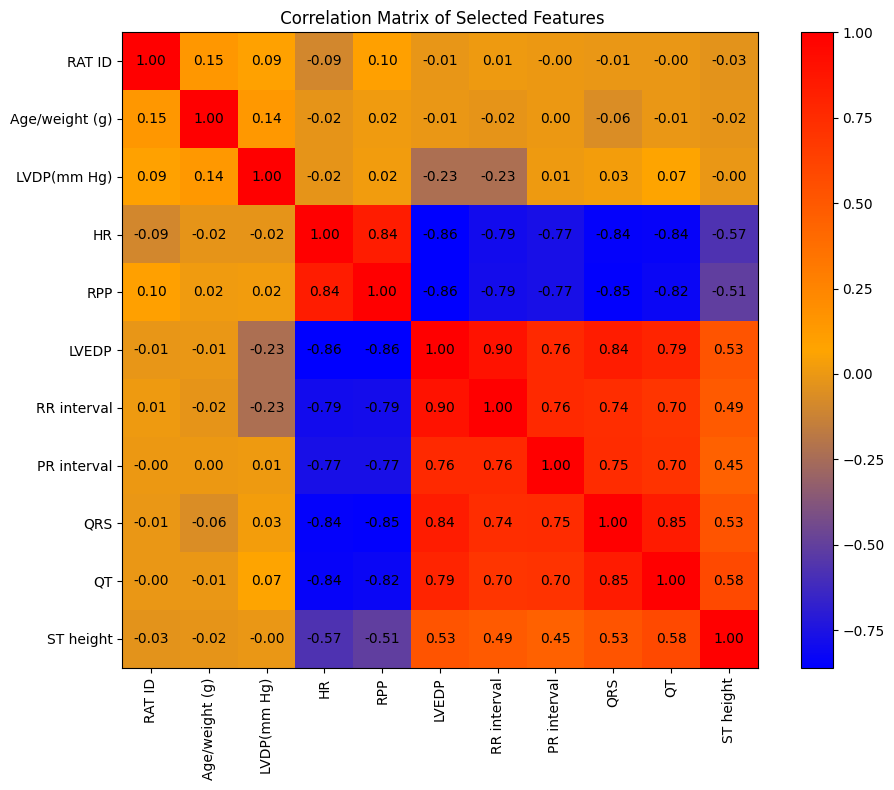

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load your file
df = pd.read_excel("Data_v1_16-8-2025.xlsx")

target_column = "Target Class"
cols_to_drop = ["Exposure type", "Days", "Sex"]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Separate features
X = df.drop(columns=[target_column])

# Compute correlation
corr = X.corr(numeric_only=True)

# Custom Blue → Orange → Red colormap
colors = ["blue", "orange", "red"]
cmap_custom = LinearSegmentedColormap.from_list("blue_orange_red", colors)

plt.figure(figsize=(10, 8))

plt.imshow(corr, cmap=cmap_custom, interpolation='nearest')
plt.colorbar()

# Tick labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Add values inside cells
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

plt.title(" Correlation Matrix of Selected Features")
plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

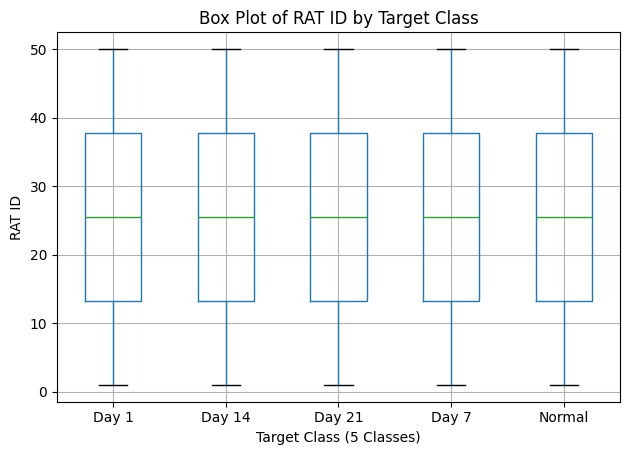

<Figure size 600x400 with 0 Axes>

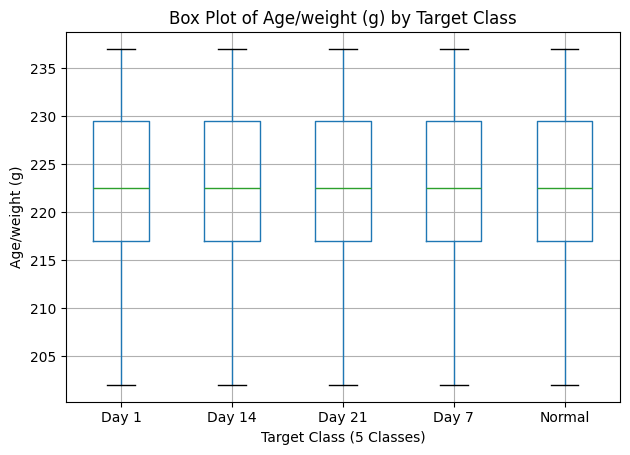

<Figure size 600x400 with 0 Axes>

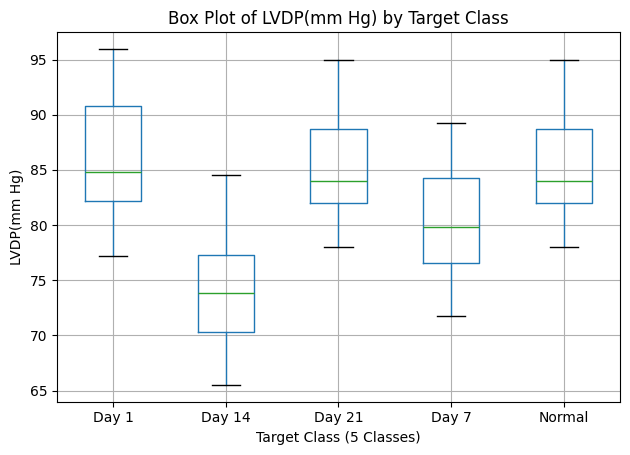

<Figure size 600x400 with 0 Axes>

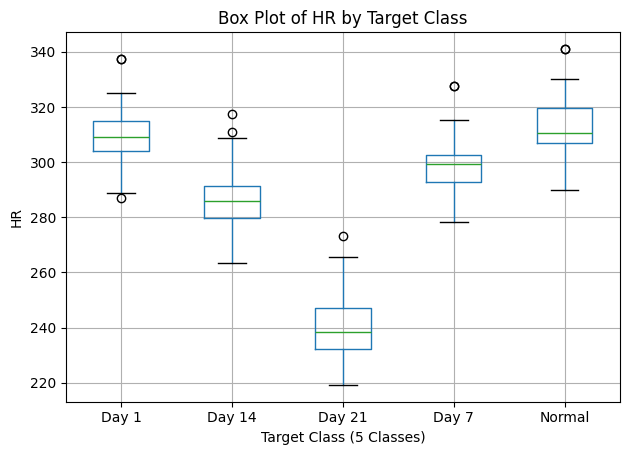

<Figure size 600x400 with 0 Axes>

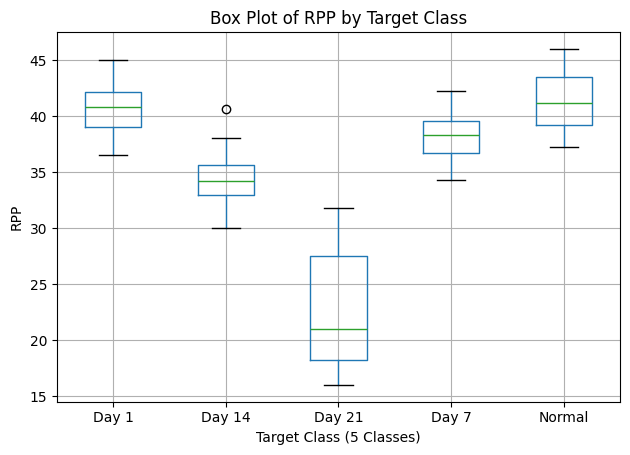

<Figure size 600x400 with 0 Axes>

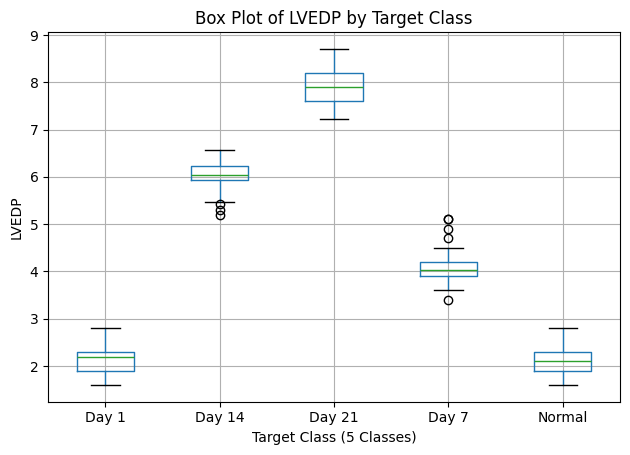

<Figure size 600x400 with 0 Axes>

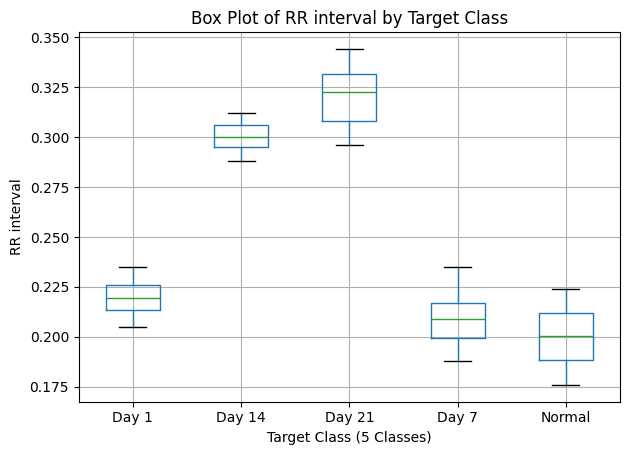

<Figure size 600x400 with 0 Axes>

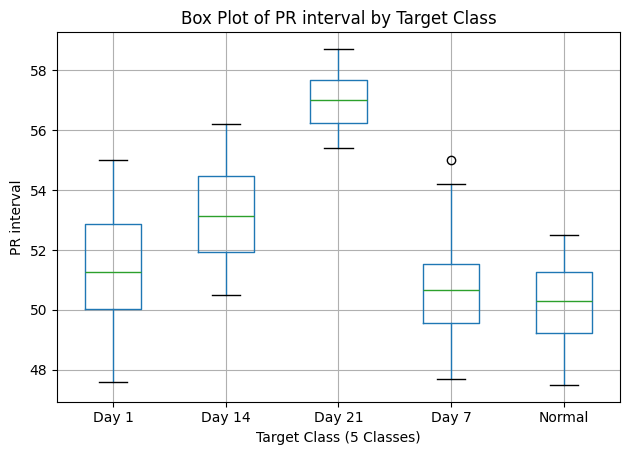

<Figure size 600x400 with 0 Axes>

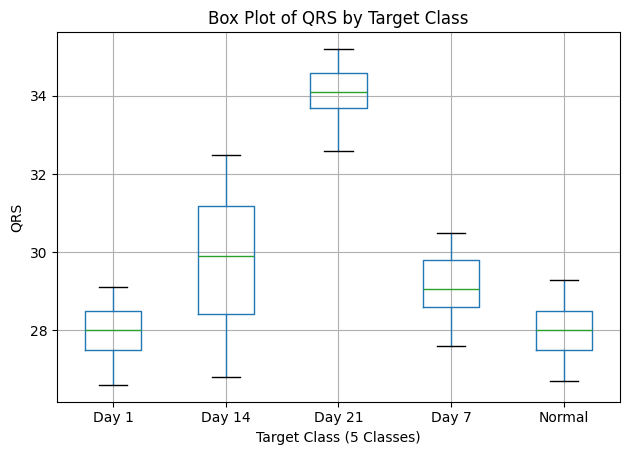

<Figure size 600x400 with 0 Axes>

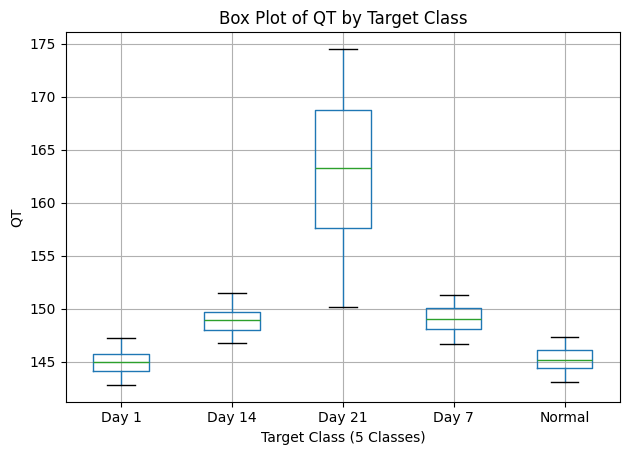

<Figure size 600x400 with 0 Axes>

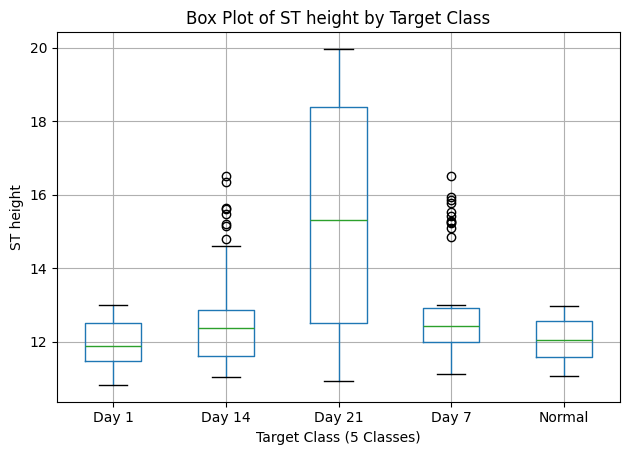

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("Data_v1_16-8-2025.xlsx")

target_column = "Days"
cols_to_drop = ["Exposure type", "Sex"]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Ensure target is categorical
df[target_column] = df[target_column].astype(str)

# Select numeric features only
numeric_cols = df.select_dtypes(include="number").columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col, by=target_column)
    plt.title(f"Box Plot of {col} by Target Class")
    plt.suptitle("")  # remove auto title
    plt.xlabel("Target Class (5 Classes)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


<Figure size 600x400 with 0 Axes>

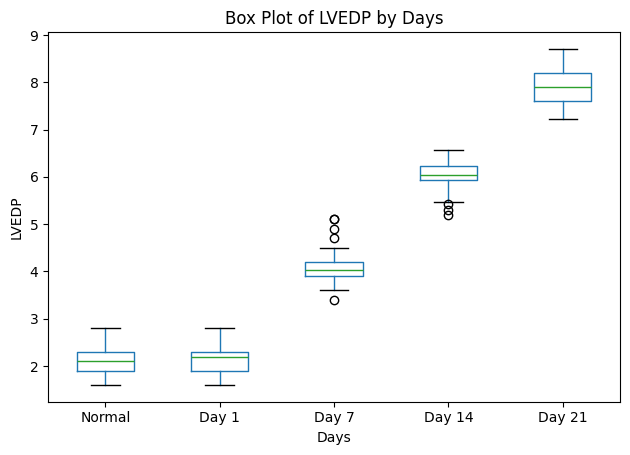

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("Data_v1_16-8-2025.xlsx")

target_column = "Days"

# Define correct order
day_order = ["Normal","Day 1", "Day 7", "Day 14", "Day 21"]

# Convert to ordered categorical
df[target_column] = pd.Categorical(
    df[target_column],
    categories=day_order,
    ordered=True
)

plt.figure(figsize=(6, 4))
df.boxplot(column="LVEDP", by=target_column)

plt.title("Box Plot of LVEDP by Days")
plt.suptitle("")        # remove default pandas title
plt.ylabel("LVEDP")
plt.grid(False)
plt.tight_layout()
plt.show()


Training MLP...
Training XGBoost...
Training Decision Tree...
Training KNN...
Training SVM...


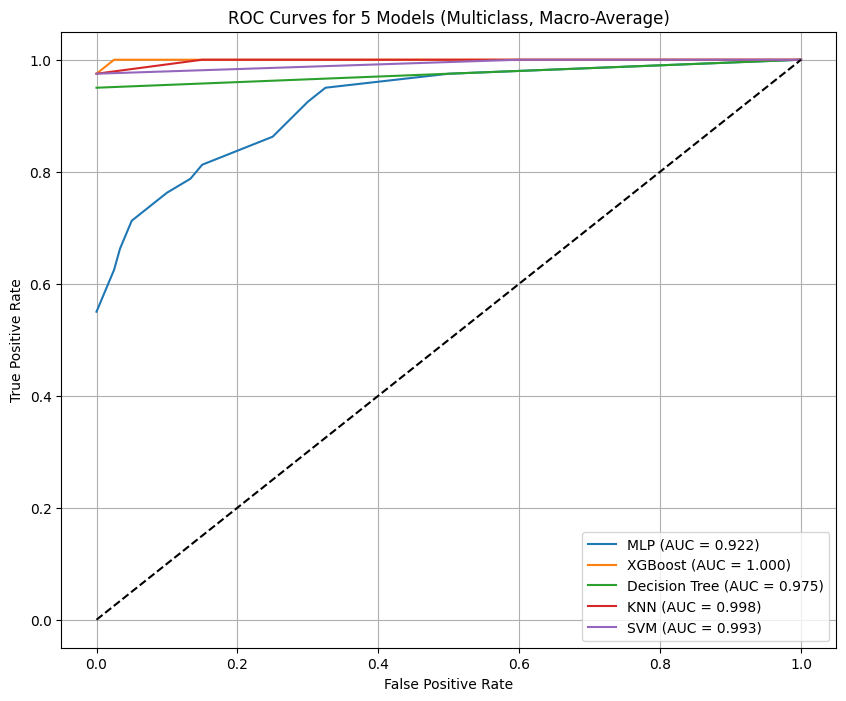

In [ ]:
# ================================================================
# 📌 IMPORTS
# ================================================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.multiclass import OneVsRestClassifier

# ================================================================
# 📌 LOAD + PREPROCESS
# ================================================================
df = pd.read_excel("/content/Data_v1_16-8-2025.xlsx")

cols_to_drop = ["Exposure type", "Days", "Sex"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
df = df.dropna()

label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

X = df.drop("Target Class", axis=1)
y = df["Target Class"]

classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ================================================================
# 📌 WRAP ALL MODELS IN OVR (IMPORTANT!)
# ================================================================
models = {
    "MLP": OneVsRestClassifier(MLPClassifier(max_iter=2000, early_stopping=True)),
    "XGBoost": OneVsRestClassifier(XGBClassifier(eval_metric='logloss')),
    "Decision Tree": OneVsRestClassifier(DecisionTreeClassifier()),
    "KNN": OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5)),
    "SVM": OneVsRestClassifier(SVC(probability=True))
}

# ================================================================
# 📌 PLOT ROC
# ================================================================
plt.figure(figsize=(10, 8))

for model_name, model in models.items():

    print(f"Training {model_name}...")

    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)

    # Always (n_samples, n_classes) now
    y_score = np.array(y_score)

    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    macro_auc = auc(all_fpr, mean_tpr)

    plt.plot(all_fpr, mean_tpr, label=f"{model_name} (AUC = {macro_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for 5 Models (Multiclass, Macro-Average)")
plt.legend()
plt.grid(True)
plt.show()



   KNN  



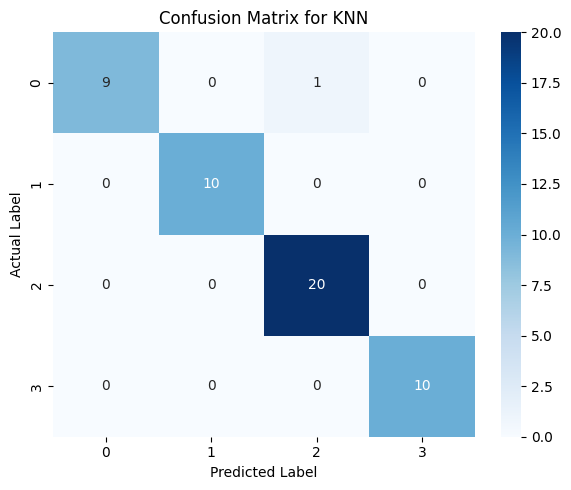


   SVM  



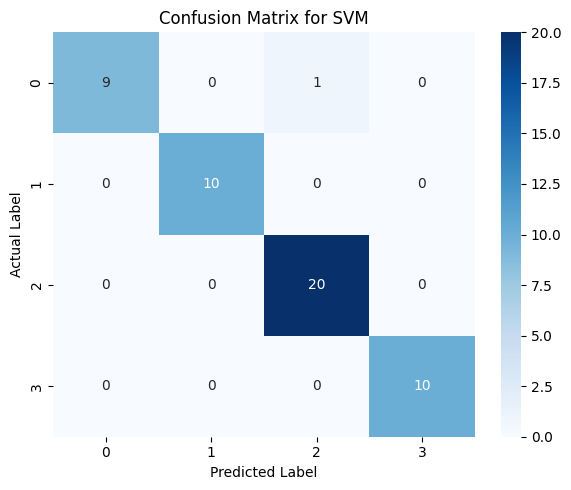


   Decision Tree  



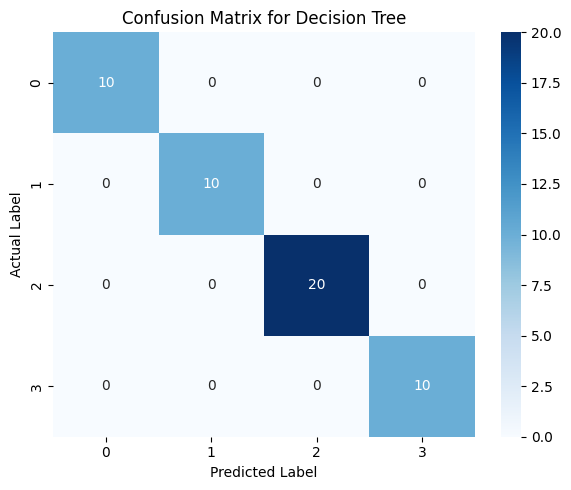


   MLP  



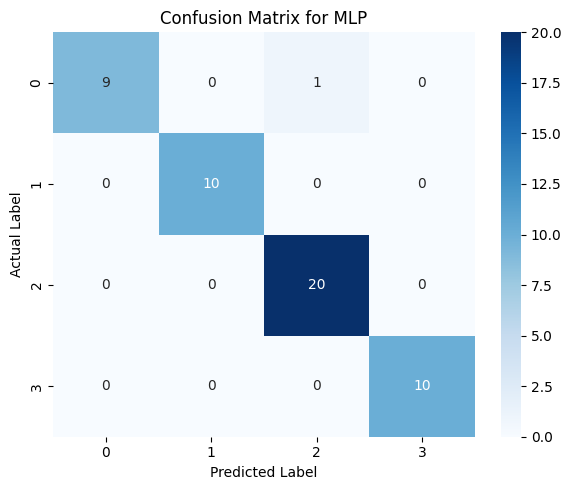


   XGBoost  



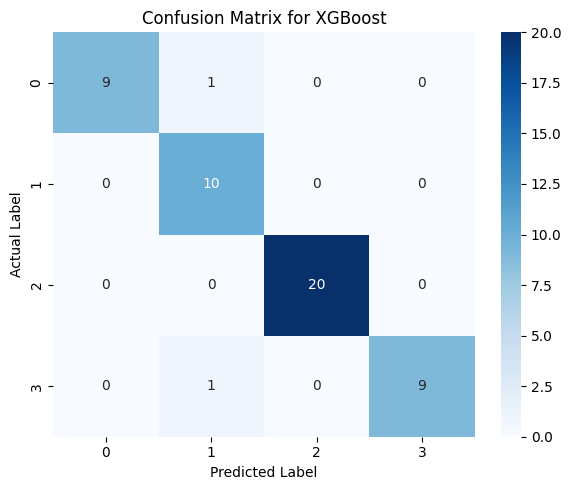

In [ ]:
# -------------------------
# Function to plot confusion matrix (same style as your image)
# -------------------------
import seaborn as sns

def plot_confusion_matrix_full(cm, classes, title):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=classes, yticklabels=classes)

    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.tight_layout()
    plt.show()


# -------------------------
# Train models and plot FULL CM for each model
# -------------------------
classes = np.unique(y)

for model_name, model in models.items():
    print("\n===============================")
    print(f"   {model_name}  ")
    print("===============================\n")

    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Full combined confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot like your LR image
    plot_confusion_matrix_full(
        cm,
        classes,
        f"Confusion Matrix for {model_name}"
    )


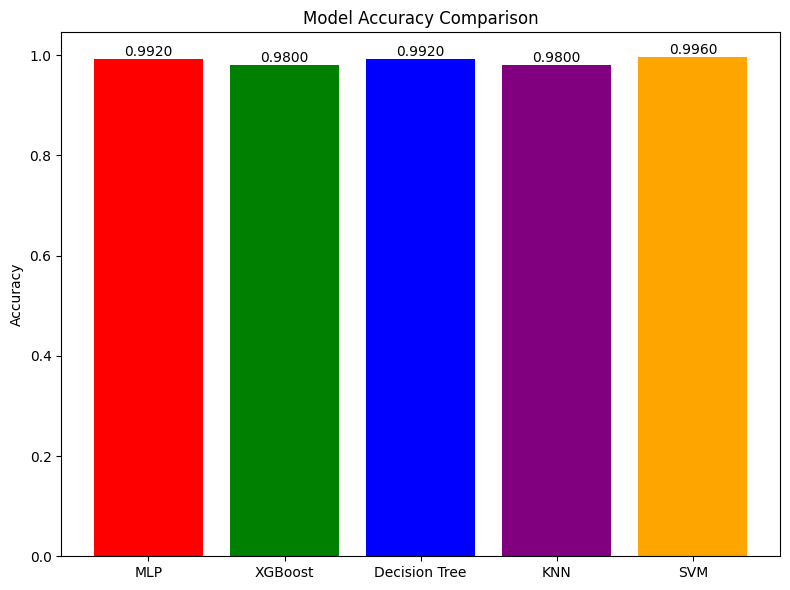

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ["MLP", "XGBoost", "Decision Tree", "KNN", "SVM"]
accuracy = [0.9920, 0.9800, 0.9920, 0.9800, 0.9960]

# Different colors for each bar
colors = ["red", "green", "blue", "purple", "orange"]

# Plot
plt.figure(figsize=(8,6))
bars = plt.bar(models, accuracy, color=colors)

# Add values on top of bars
for bar, acc in zip(bars, accuracy):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{acc:.4f}",
        ha='center',
        va='bottom'
    )

plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()



--- Fold 1 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

--- Fold 2 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

--- Fold 3 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

--- Fold 4 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

--- Fold 5 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


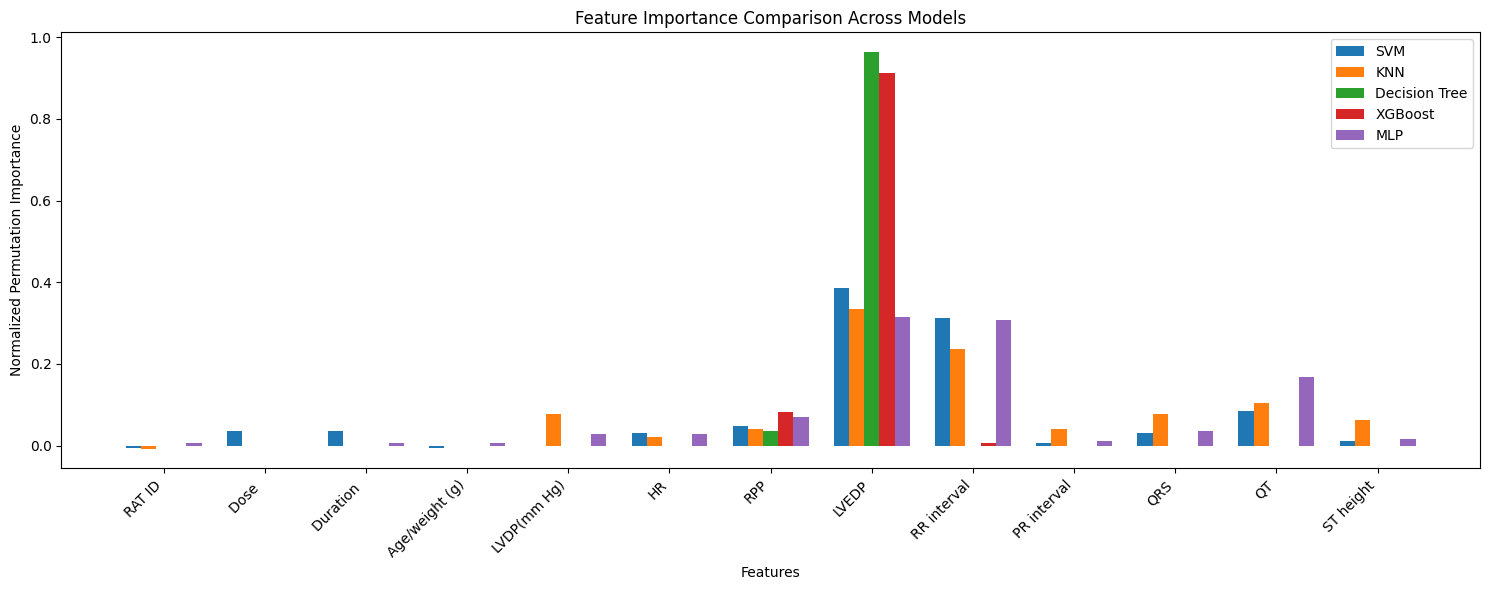

In [ ]:
# =========================
# IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# =========================
# LOAD DATA
# =========================
df = pd.read_excel('/content/Data_v1_16-8-2025.xlsx')

# Drop unwanted columns
cols_to_drop = ["Exposure type", "Days", "Sex"]
df.drop(columns=cols_to_drop, inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Encode categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Separate features & target
X = df.drop("Target Class", axis=1)
y = df["Target Class"]
feature_names = X.columns.tolist()

# =========================
# PERMUTATION IMPORTANCE
# =========================
def permutation_importance(model, X_val, y_val, predict_fn):
    baseline_pred = predict_fn(X_val)
    baseline_acc = accuracy_score(y_val, baseline_pred)

    importances = []
    for i in range(X_val.shape[1]):
        X_perm = X_val.copy()
        np.random.shuffle(X_perm[:, i])

        perm_pred = predict_fn(X_perm)
        perm_acc = accuracy_score(y_val, perm_pred)

        importances.append(baseline_acc - perm_acc)

    return np.array(importances)

# =========================
# CROSS VALIDATION
# =========================
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

importance_results = {
    "SVM": [],
    "KNN": [],
    "Decision Tree": [],
    "XGBoost": [],
    "MLP": []
}

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_val_s = scaler.transform(X_val)

    # =========================
    # SVM
    # =========================
    svm = SVC(kernel="rbf")
    svm.fit(X_train_s, y_train)

    imp = permutation_importance(
        svm, X_val_s, y_val, lambda X: svm.predict(X)
    )
    importance_results["SVM"].append(imp)

    # =========================
    # KNN
    # =========================
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_s, y_train)

    imp = permutation_importance(
        knn, X_val_s, y_val, lambda X: knn.predict(X)
    )
    importance_results["KNN"].append(imp)

    # =========================
    # DECISION TREE
    # =========================
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train_s, y_train)

    imp = permutation_importance(
        dt, X_val_s, y_val, lambda X: dt.predict(X)
    )
    importance_results["Decision Tree"].append(imp)

    # =========================
    # XGBOOST
    # =========================
    xgb = XGBClassifier(
        objective="multi:softmax",
        num_class=len(np.unique(y)),
        eval_metric="mlogloss",
        random_state=42
    )
    xgb.fit(X_train_s, y_train)

    imp = permutation_importance(
        xgb, X_val_s, y_val, lambda X: xgb.predict(X)
    )
    importance_results["XGBoost"].append(imp)

    # =========================
    # MLP
    # =========================
    y_train_cat = to_categorical(y_train)
    y_val_cat = to_categorical(y_val)

    mlp = Sequential([
        Dense(128, activation="relu", input_shape=(X_train_s.shape[1],)),
        Dense(64, activation="relu"),
        Dense(y_train_cat.shape[1], activation="softmax")
    ])

    mlp.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    mlp.fit(X_train_s, y_train_cat, epochs=50, batch_size=32, verbose=0)

    imp = permutation_importance(
        mlp,
        X_val_s,
        y_val,
        lambda X: np.argmax(mlp.predict(X), axis=1)
    )
    importance_results["MLP"].append(imp)

# =========================
# AVERAGE IMPORTANCE
# =========================
avg_importance = {
    model: np.mean(vals, axis=0)
    for model, vals in importance_results.items()
}

importance_df = pd.DataFrame(avg_importance, index=feature_names)

# Normalize (optional but recommended)
importance_df = importance_df / importance_df.abs().sum()

# =========================
# BAR CHART COMPARISON
# =========================
x = np.arange(len(feature_names))
width = 0.15

plt.figure(figsize=(15, 6))

for i, model in enumerate(importance_df.columns):
    plt.bar(x + i*width, importance_df[model], width, label=model)

plt.xticks(x + width*2, feature_names, rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Normalized Permutation Importance")
plt.title("Feature Importance Comparison Across Models")
plt.legend()
plt.tight_layout()
plt.show()


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


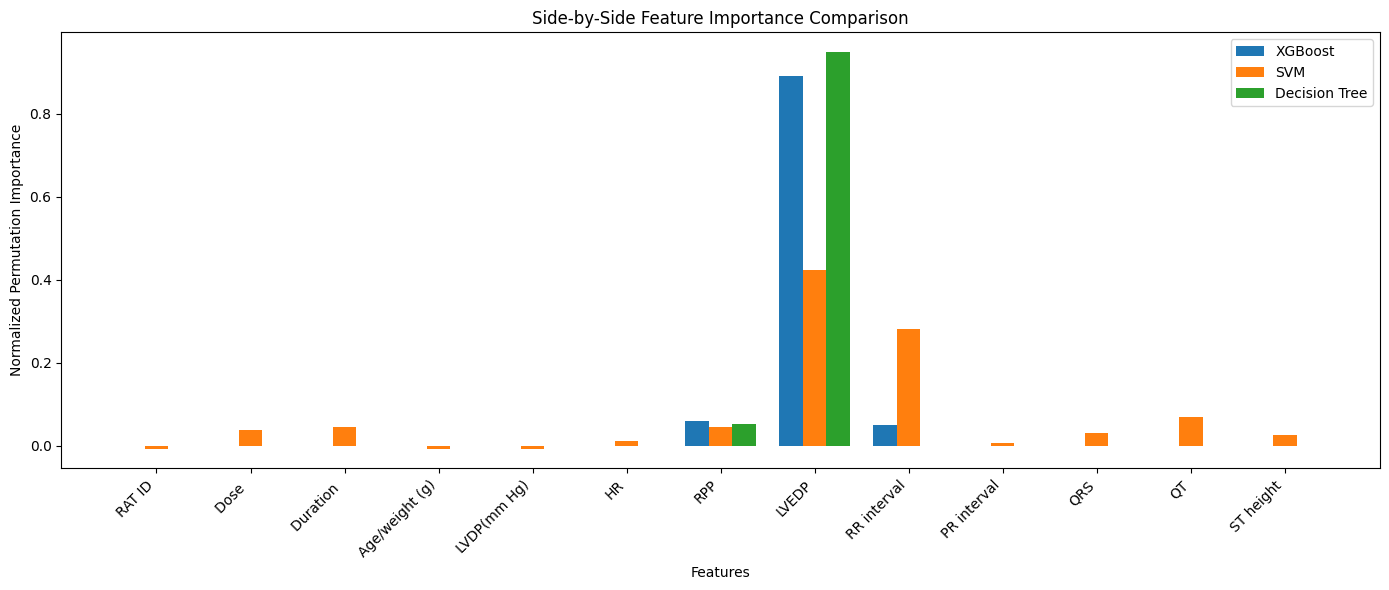

In [ ]:
# =========================
# IMPORTS
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# =========================
# LOAD DATA
# =========================
df = pd.read_excel("/content/Data_v1_16-8-2025.xlsx")

# Drop unwanted columns
cols_to_drop = ["Exposure type", "Days", "Sex"]
df.drop(columns=cols_to_drop, inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Encode categorical columns
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col])

# Separate features & target
X = df.drop("Target Class", axis=1)
y = df["Target Class"]
feature_names = X.columns.tolist()

# =========================
# PERMUTATION IMPORTANCE
# =========================
def permutation_importance(model, X_val, y_val):
    baseline_pred = model.predict(X_val)
    baseline_acc = accuracy_score(y_val, baseline_pred)

    importances = []
    for i in range(X_val.shape[1]):
        X_perm = X_val.copy()
        np.random.shuffle(X_perm[:, i])

        perm_pred = model.predict(X_perm)
        perm_acc = accuracy_score(y_val, perm_pred)

        importances.append(baseline_acc - perm_acc)

    return np.array(importances)

# =========================
# CROSS-VALIDATION
# =========================
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

importance_scores = {
    "XGBoost": [],
    "SVM": [],
    "Decision Tree": []
}

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    print(f"Fold {fold}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_val_s = scaler.transform(X_val)

    # ----- SVM -----
    svm = SVC(kernel="rbf")
    svm.fit(X_train_s, y_train)
    importance_scores["SVM"].append(
        permutation_importance(svm, X_val_s, y_val)
    )

    # ----- Decision Tree -----
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train_s, y_train)
    importance_scores["Decision Tree"].append(
        permutation_importance(dt, X_val_s, y_val)
    )

    # ----- XGBoost -----
    xgb = XGBClassifier(
        objective="multi:softmax",
        num_class=len(np.unique(y)),
        eval_metric="mlogloss",
        random_state=42
    )
    xgb.fit(X_train_s, y_train)
    importance_scores["XGBoost"].append(
        permutation_importance(xgb, X_val_s, y_val)
    )

# =========================
# AVERAGE & NORMALIZE
# =========================
avg_importance = {
    model: np.mean(scores, axis=0)
    for model, scores in importance_scores.items()
}

importance_df = pd.DataFrame(avg_importance, index=feature_names)

# Normalize for fair visual comparison
importance_df = importance_df / importance_df.abs().sum()

# =========================
# SIDE-BY-SIDE BAR CHART
# =========================
x = np.arange(len(feature_names))
width = 0.25

plt.figure(figsize=(14, 6))

plt.bar(x - width, importance_df["XGBoost"], width, label="XGBoost")
plt.bar(x, importance_df["SVM"], width, label="SVM")
plt.bar(x + width, importance_df["Decision Tree"], width, label="Decision Tree")

plt.xticks(x, feature_names, rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Normalized Permutation Importance")
plt.title("Side-by-Side Feature Importance Comparison")
plt.legend()
plt.tight_layout()
plt.show()
